# EXERCISE PROBLEMS

# 1.Import dataset and display first 5 rows

In [1]:
import pandas as pd

# Load the dataset
file_path = 'tvmarketing.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
df.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


# 2.Check column data types
# 3.Check the shape of the Data Frame (rows, columns)
# 4.Look at summary statistics

In [2]:
# Check column data types
column_data_types = df.dtypes

# Check the shape of the DataFrame (rows, columns)
shape = df.shape

# Summary statistics
summary_stats = df.describe()

column_data_types, shape, summary_stats


(TV       float64
 Sales    float64
 dtype: object,
 (200, 2),
                TV       Sales
 count  200.000000  200.000000
 mean   147.042500   14.022500
 std     85.854236    5.217457
 min      0.700000    1.600000
 25%     74.375000   10.375000
 50%    149.750000   12.900000
 75%    218.825000   17.400000
 max    296.400000   27.000000)

 # 5.Visualize the relationship between the features and the dependent variable using scatterplots

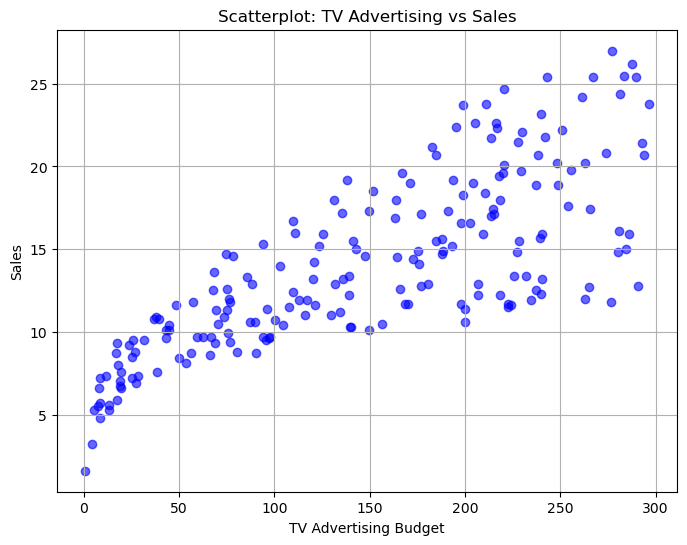

In [3]:
import matplotlib.pyplot as plt

# Scatterplot to visualize the relationship between 'TV' and 'Sales'
plt.figure(figsize=(8, 6))
plt.scatter(df['TV'], df['Sales'], color='blue', alpha=0.6)
plt.title('Scatterplot: TV Advertising vs Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


 # 6.Prepare X (feature variables) and y (response variable)

In [4]:
# Prepare X (feature variable) and y (response variable)
X = df[['TV']]  # Feature (TV advertising budget)
y = df['Sales']  # Response (Sales) 

# Display first 5 values of X and y
X.head(), y.head()


(      TV
 0  230.1
 1   44.5
 2   17.2
 3  151.5
 4  180.8,
 0    22.1
 1    10.4
 2     9.3
 3    18.5
 4    12.9
 Name: Sales, dtype: float64)

# 7.Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,y_train, X_test, y_test

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((140, 1), (60, 1), (140,), (60,))

# 8.Print the shape of train data and test data

In [6]:
# Print the shape of the training and testing data
print("Training Data Shape:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("\nTesting Data Shape:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Training Data Shape:
X_train: (140, 1), y_train: (140,)

Testing Data Shape:
X_test: (60, 1), y_test: (60,)


# 9.Perform Linear Regression (on train data) without using any library and print the coefficients values

In [8]:
import numpy as np

# Add a bias (intercept) term to X_train (column of 1s)
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]

# Convert y_train to a column vector (2D array)
y_train_matrix = y_train.values.reshape(-1, 1)

# Compute the coefficients using the normal equation: (X^T X)^(-1) X^T y
XTX_inv = np.linalg.inv(X_train_bias.T.dot(X_train_bias))
XTy = X_train_bias.T.dot(y_train_matrix)
coefficients = XTX_inv.dot(XTy)

# Extract intercept and slope
intercept, slope = coefficients[0][0], coefficients[1][0]
intercept, slope


(7.23945983075118, 0.04640780212815249)

# 10.Create the model using the calculated coefficients and make predictions on the testing set

In [ ]:
# Add the bias term to the test data (X_test)
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# Predict the sales using the model coefficients
y_pred = X_test_bias.dot(coefficients)

# Display the first 5 predicted values
y_pred.flatten()[:5]


# 11. Perform Linear Regression using library(sklearn)

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted Sales', alpha=0.6)
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()


# 12. Print the intercept and coefficients

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
intercept_sklearn = model.intercept_
slope_sklearn = model.coef_[0]

# Print the coefficients
intercept_sklearn, slope_sklearn


In [ ]:
# Print the intercept and coefficient
print(f"Intercept (β₀): {model.intercept_}")
print(f"Coefficient (β₁): {model.coef_[0]}")


# 13. Make predictions on the testing set - y_pred

In [ ]:
# Make predictions on the test set using the trained model
y_pred_sklearn = model.predict(X_test)

# Display the first 5 predicted values
y_pred_sklearn[:5]


# 14. Plot train data and the model

In [ ]:
# Plot training data and the regression model
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Linear Regression Model (Train Data)')
plt.legend()
plt.grid(True)
plt.show()


# 15. Plot test data and the model

In [ ]:
# Plot test data and the regression model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.6)
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Regression Line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Linear Regression Model (Test Data)')
plt.legend()
plt.grid(True)
plt.show()


# 16. Print Mean Squared Error and R Squared Value

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R² Score
mse = mean_squared_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


# 17. Calculate and print R Squared and Adjusted R Squared values without any library

In [ ]:
# Convert y_test to a NumPy array for calculations
y_test_array = y_test.values

# Calculate Total Sum of Squares (TSS) and Residual Sum of Squares (RSS)
tss = np.sum((y_test_array - np.mean(y_test_array)) ** 2)  # Total Sum of Squares
rss = np.sum((y_test_array - y_pred_sklearn.flatten()) ** 2)  # Residual Sum of Squares

# Compute R Squared (R²)
r_squared_manual = 1 - (rss / tss)

# Number of samples (n) and predictors (p)
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors

# Compute Adjusted R Squared (R²_adj)
adjusted_r_squared_manual = 1 - ((1 - r_squared_manual) * (n - 1) / (n - p - 1))

# Print results
r_squared_manual, adjusted_r_squared_manual
